Import Libraries

In [1]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL with a placeholder for the page number
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/{}/?sortby=post_date%3ADesc&pagesize=100"

# List to hold all reviews data
reviews_data = []

# Initialize a global serial number
serial_no = 1

# Function to fetch data from a specific page
def fetch_page(page_number):
    global serial_no  # Use the global serial number variable
    url = base_url.format(page_number)
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all review articles on the page
        review_articles = soup.find_all('article', class_='comp_media-review-rated')

        # Loop through each review article and extract the details
        for article in review_articles:
            review = {}
            review['Serial_No'] = serial_no
            
            # Scraping the "Trip Verified" status
            trip_verified = article.find('em').text.strip() if article.find('em') else None
            review['Trip_Verified'] = trip_verified

            # Scraping the feedback text and cleaning it
            feedback_text = article.find('div', itemprop="reviewBody").text.strip()
            feedback_text = feedback_text.replace(trip_verified, '').strip() if trip_verified else feedback_text
            feedback_text = feedback_text.lstrip('|').strip()
            review['Feedback'] = feedback_text
            
            review['Overall_Rating'] = article.find('div', class_='rating-10').find('span', itemprop='ratingValue').text.strip() if article.find('div', class_='rating-10') else None
            review['Date'] = article.find('meta', itemprop='datePublished')['content'] if article.find('meta', itemprop='datePublished') else None
            review['Type_of_Traveller'] = article.find('td', class_='review-rating-header type_of_traveller').find_next('td').text.strip() if article.find('td', class_='review-rating-header type_of_traveller') else None
            review['Seat_Type'] = article.find('td', class_='review-rating-header cabin_flown').find_next('td').text.strip() if article.find('td', class_='review-rating-header cabin_flown') else None
            review['Seat_Comfort'] = len(article.find('td', class_='review-rating-header seat_comfort').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header seat_comfort') else None
            review['Cabin_Staff_Service'] = len(article.find('td', class_='review-rating-header cabin_staff_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header cabin_staff_service') else None
            review['Ground_Service'] = len(article.find('td', class_='review-rating-header ground_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header ground_service') else None
            review['Wifi_Connectivity'] = len(article.find('td', class_='review-rating-header wifi_and_connectivity').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header wifi_and_connectivity') else None
            review['Food_and_Beverages'] = len(article.find('td', class_='review-rating-header food_and_beverages').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header food_and_beverages') else None
            review['Inflight_Entertainment'] = len(article.find('td', class_='review-rating-header inflight_entertainment').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header inflight_entertainment') else None
            review['Value_For_Money'] = len(article.find('td', class_='review-rating-header value_for_money').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header value_for_money') else None
            review['Recommended'] = article.find('td', class_='review-rating-header recommended').find_next('td').text.strip() if article.find('td', class_='review-rating-header recommended') else None

            # Add the review dictionary to the list
            reviews_data.append(review)
            serial_no += 1  # Increment the serial number for the next review

    else:
        print(f"Failed to retrieve page {page_number}")

# Loop to fetch data from pages 1 to 32
for page in range(1, 33):
    print(f"Fetching page {page}...")
    fetch_page(page)

# Save all reviews data to a CSV file
if reviews_data:
    keys = reviews_data[0].keys()
    with open('british_airways_reviews.csv', 'w', newline='', encoding='utf-8') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=keys)
        dict_writer.writeheader()
        dict_writer.writerows(reviews_data)
    print(f"Saved {len(reviews_data)} reviews to 'british_airways_reviews.csv'.")
else:
    print("No data to save.")

In [3]:
print(reviews_data[0])

{'Serial_No': 1, 'Trip_Verified': 'Trip Verified', 'Feedback': '✅  |   The employee at Venice Airport checkin was very rude to us. We made a mistake and got in the Gold or Silver line (as we didn’t see the sign) and when we got to the counter she scolded and berated us for being in the wrong line. She said we didn’t know how to read and would not let it go even after we apologized and said we would be happy to go to the end of the other line. She continued to be discourteous toward us and made us feel like we were terrible people. This was the very worst customer service we have experienced by an airline.', 'Overall_Rating': '3', 'Date': '2025-04-13', 'Type_of_Traveller': 'Couple Leisure', 'Seat_Type': 'Economy Class', 'Seat_Comfort': 5, 'Cabin_Staff_Service': 5, 'Ground_Service': 1, 'Wifi_Connectivity': None, 'Food_and_Beverages': None, 'Inflight_Entertainment': None, 'Value_For_Money': 3, 'Recommended': 'no'}


In [4]:
df = pd.read_csv("british_airways_reviews.csv")
df.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Date,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Wifi_Connectivity,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended
0,1,Trip Verified,✅ | The employee at Venice Airport checkin ...,3,2025-04-13,Couple Leisure,Economy Class,5.0,5.0,1.0,NaN,NaN,NaN,3,no
1,2,Trip Verified,"✅ | I had only 1 bag with me, a carry on tr...",1,2025-04-12,Solo Leisure,Economy Class,1.0,2.0,1.0,NaN,NaN,NaN,1,no
2,3,Trip Verified,✅ | Check in and security at T5 quick. Both G...,7,2025-04-09,Family Leisure,Business Class,3.0,5.0,4.0,1.0,4.0,NaN,3,yes
3,4,Not Verified,LHR T5 BA Gold Wing worked well. Pleasant chec...,9,2025-04-03,Business,First Class,5.0,5.0,4.0,3.0,5.0,5.0,4,yes
4,5,Not Verified,Very good service on this route BA2710 30th Ma...,10,2025-03-31,Couple Leisure,Business Class,4.0,5.0,4.0,NaN,5.0,NaN,4,yes


In [5]:
df.shape

(3200, 15)

In [24]:
#null checking

(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

Wifi_Connectivity         78.43750
Trip_Verified             49.53125
Inflight_Entertainment    38.96875
Food_and_Beverages        13.75000
Cabin_Staff_Service        4.40625
Seat_Comfort               3.93750
Ground_Service             3.78125
Type_of_Traveller          1.31250
Seat_Type                  0.06250
Serial_No                  0.00000
Feedback                   0.00000
Overall_Rating             0.00000
Date                       0.00000
Value_For_Money            0.00000
Recommended                0.00000
dtype: float64

In [23]:
df.duplicated().any()

False

In [21]:
target_counts = df['Recommended'].value_counts()
target_counts

Recommended
no     2055
yes    1145
Name: count, dtype: int64

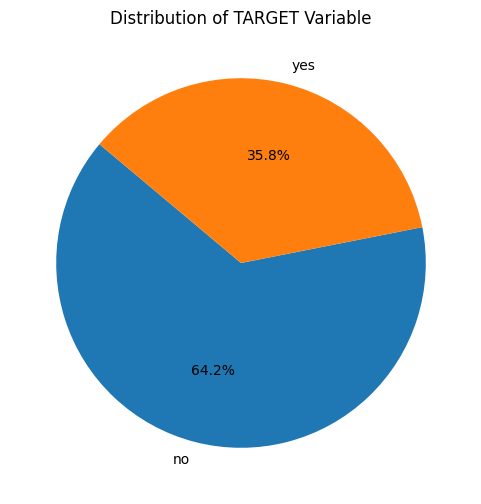

In [22]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TARGET Variable')
plt.show()

Data Pre-processing

In [28]:
'''
Since null observations can be said to be not verified, we input 'Not Verified' for null values.
'''
df.loc[:, 'Trip_Verified'] = df['Trip_Verified'].fillna('Not Verified')

In [26]:
'''
we drop 'Wifi_Connectivity' column for having too many null values.
Also, we drop 'Date' column due to less relevance.
'''

df.drop(columns=["Wifi_Connectivity","Date"],inplace=True,axis=1)
df.shape

(3200, 13)

In [29]:
df.isnull().sum().sort_values(ascending = False)

Inflight_Entertainment    1247
Food_and_Beverages         440
Cabin_Staff_Service        141
Seat_Comfort               126
Ground_Service             121
Type_of_Traveller           42
Seat_Type                    2
Serial_No                    0
Trip_Verified                0
Feedback                     0
Overall_Rating               0
Value_For_Money              0
Recommended                  0
dtype: int64

In [30]:
df.dtypes

Serial_No                   int64
Trip_Verified              object
Feedback                   object
Overall_Rating              int64
Type_of_Traveller          object
Seat_Type                  object
Seat_Comfort              float64
Cabin_Staff_Service       float64
Ground_Service            float64
Food_and_Beverages        float64
Inflight_Entertainment    float64
Value_For_Money             int64
Recommended                object
dtype: object

In [31]:
'''
For numeric columns, we replace null values with 'mode'
'''
numeric_null_columns = ['Inflight_Entertainment', 'Food_and_Beverages', 'Ground_Service', 'Cabin_Staff_Service','Seat_Comfort']

df.Inflight_Entertainment.fillna(df.Inflight_Entertainment.mode()[0],inplace = True)
df.Food_and_Beverages.fillna(df.Food_and_Beverages.mode()[0],inplace = True)
df.Ground_Service.fillna(df.Ground_Service.mode()[0],inplace = True)
df.Cabin_Staff_Service.fillna(df.Cabin_Staff_Service.mode()[0],inplace = True)
df.Seat_Comfort.fillna(df.Seat_Comfort.mode()[0],inplace = True)

In [33]:
df['Type_of_Traveller'].value_counts(dropna=False)

Type_of_Traveller
Couple Leisure    1064
Solo Leisure       970
Business           682
Family Leisure     442
NaN                 42
Name: count, dtype: int64

In [34]:
df['Seat_Type'].value_counts(dropna=False)

Seat_Type
Economy Class      1726
Business Class      996
Premium Economy     307
First Class         169
NaN                   2
Name: count, dtype: int64

In [35]:
'''
We input 'Couple Leisure' for null values since it is the highest occuring 'Type_of_Traveller'.
We input 'Economy Class' for null values since it is the highest occuring 'Seat_Type
'''

df.Type_of_Traveller.fillna('Couple Leisure',inplace = True)
df.Seat_Type.fillna('Economy Class',inplace = True)

In [36]:
df.isnull().sum()

Serial_No                 0
Trip_Verified             0
Feedback                  0
Overall_Rating            0
Type_of_Traveller         0
Seat_Type                 0
Seat_Comfort              0
Cabin_Staff_Service       0
Ground_Service            0
Food_and_Beverages        0
Inflight_Entertainment    0
Value_For_Money           0
Recommended               0
dtype: int64

In [37]:
data = df[["Serial_No","Trip_Verified","Feedback","Overall_Rating","Recommended"]]
data.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended
0,1,Trip Verified,✅ | The employee at Venice Airport checkin ...,3,no
1,2,Trip Verified,"✅ | I had only 1 bag with me, a carry on tr...",1,no
2,3,Trip Verified,✅ | Check in and security at T5 quick. Both G...,7,yes
3,4,Not Verified,LHR T5 BA Gold Wing worked well. Pleasant chec...,9,yes
4,5,Not Verified,Very good service on this route BA2710 30th Ma...,10,yes


Removing Stop Words

In [39]:
import re
import nltk
from nltk.corpus import stopwords
import emoji

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define a function to clean the text
def clean(text):
    # Remove emojis from the text
    text = emoji.replace_emoji(text, replace='')  # Remove all emojis

    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Create a new column 'Cleaned Reviews' by applying the clean function
data['Cleaned Reviews'] = data['Feedback'].apply(clean)

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
pd.set_option('display.max_colwidth', None)
data.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews
0,1,Trip Verified,✅ | The employee at Venice Airport checkin was very rude to us. We made a mistake and got in the Gold or Silver line (as we didn’t see the sign) and when we got to the counter she scolded and berated us for being in the wrong line. She said we didn’t know how to read and would not let it go even after we apologized and said we would be happy to go to the end of the other line. She continued to be discourteous toward us and made us feel like we were terrible people. This was the very worst customer service we have experienced by an airline.,3,no,employee venice airport checkin rude us made mistake got gold silver line see sign got counter scolded berated us wrong line said know read would let go even apologized said would happy go end line continued discourteous toward us made us feel like terrible people worst customer service experienced airline
1,2,Trip Verified,"✅ | I had only 1 bag with me, a carry on trolley. Everyone one in boarding group 3 & 4 were forced to check-in their trolley carry-ons. They asked to take out any laptops, batteries, etc.... The woman at the boarding gate was very rude to me as I was explaining to her that this was my only bag and had nowhere to carry my laptop or other stuff that I need onboard. I tried to explain to her that the bag will not withstand being carried in the hold as it is fragile and showed her a crack from the one time I checked it in before. The bag was visibly small complying with the carry-on bag measurements.",1,no,bag carry trolley everyone one boarding group forced check trolley carry ons asked take laptops batteries etc woman boarding gate rude explaining bag nowhere carry laptop stuff need onboard tried explain bag withstand carried hold fragile showed crack one time checked bag visibly small complying carry bag measurements
2,3,Trip Verified,"✅ | Check in and security at T5 quick. Both Galleries lounges pretty much at capacity, not able to access B gates lounge as short haul, A gates departure Food options reasonable. Bus to aircraft which was quite new. On time departure. Reasonable food and drink options. Pleasant cabin crew. Bags off quickly.",7,yes,check security quick galleries lounges pretty much capacity able access b gates lounge short haul gates departure food options reasonable bus aircraft quite new time departure reasonable food drink options pleasant cabin crew bags quickly
3,4,Not Verified,"LHR T5 BA Gold Wing worked well. Pleasant check in and very fast security screening. Concorde room service attentive. C gate boarding OK but nothing special for First Passengers. Latest BA version of first with only 8 suites with privacy doors. Comfortable seat with plenty of stowage. Good screen and good choice of IFE. Amenity kit good quality and bedding, pillows cushions and blankets all good. Excellent menu and food very well presented. Cabin crew could not have been more attentive and helpful without being obtrusive. On time departure and early arrival. Bags delivered relatively swiftly and priority tagged bags were first off. All in all one of the best BA First flights I’ve had in many years. Whilst not touching the Middle Eastern carriers BA First on this showing is easily the best way to cross the Atlantic.",9,yes,lhr ba gold wing worked well pleasant check fast security screening concorde room service attentive c gate boarding ok nothing special first passengers latest ba version first suites privacy doors comfortable seat plenty stowage good screen good choice ife amenity kit good quality bedding pillows cushions blankets good excellent menu food well presented cabin crew could attentive helpful without obtrusive time departure early arrival bags delivered relatively swiftly priority tagged bags first one best ba first flights many years whilst touching middle eastern carriers ba first showing easily best way cross atlantic
4,5,Not Verified,"Very good service on this rou

Lemmatization

In [42]:
import spacy

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return lemmatized_text

# Apply the function to the 'Cleaned Reviews' column
data['Lemma'] = data['Cleaned Reviews'].apply(lemmatize_with_spacy)

In [47]:
data.sample()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma
1699,1700,Not Verified,✅ Verified Review | Gatwick to Alicante. Yesterdays flight was grim from the moment of arriving at our boarding gate and seeing two long lines of a stag and a hen party in various stages of drunkenness. Not really the company you feel safe being in a very confined space with and especially with a young baby. The language and behaviour became even more threatening as the drinks trolley ploughed up and down the aisle. Especially awful as we were confined to the smallest seating areas possible. It was all truly horrible and very disheartening as we had driven for hours to avoid these conditions in lesser aurlines. Previously we had had a lot of respect for British Airways standards now thoroughly destroyed.,1,no,verified review gatwick alicante yesterdays flight grim moment arriving boarding gate seeing two long lines stag hen party various stages drunkenness really company feel safe confined space especially young baby language behaviour became even threatening drinks trolley ploughed aisle especially awful confined smallest seating areas possible truly horrible disheartening driven hours avoid conditions lesser aurlines previously lot respect british airways standards thoroughly destroyed,verify review gatwick alicante yesterday flight grim moment arrive boarding gate see long line stag hen party stage drunkenness company feel safe confine space especially young baby language behaviour threatening drink trolley plough aisle especially awful confine small seat area possible truly horrible dishearten drive hour avoid condition less aurline previously lot respect british airways standard thoroughly destroy


### Sentiment Analysis

In [49]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
sorted(data['Overall_Rating'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
data["Overall_Rating"].value_counts()

Overall_Rating
1     870
3     381
2     380
8     306
7     240
9     233
10    232
4     217
5     190
6     151
Name: count, dtype: int64

In [75]:

# Group by Overall_Rating and get value counts of Recommended
rating_recommend_all = data.groupby('Overall_Rating')['Recommended'].value_counts()

# Show as pivoted table
print(rating_recommend_all.unstack(fill_value=0))

Recommended      no  yes
Overall_Rating          
1               865    5
2               376    4
3               376    5
4               204   13
5               145   45
6                49  102
7                27  213
8                10  296
9                 1  232
10                2  230


In [80]:
# Define sentiment labels from rating
data['sentiment'] = data['Overall_Rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

In [85]:
data_lite = data[['Overall_Rating', 'sentiment', 'Recommended']]
data_lite.head()

,Overall_Rating,sentiment,Recommended
0,3,negative,no
1,1,negative,no
2,7,positive,yes
3,9,positive,yes
4,10,positive,yes


In [86]:
# Separate verified and unverified reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

In [87]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER and convert to labels
def analyze_sentiment_vader(text):
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Function to analyze sentiment using TextBlob and convert to labels
def analyze_sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis separately for positive and negative reviews
positive_reviews['VADER_Sentiment'] = positive_reviews['Lemma'].apply(analyze_sentiment_vader)
positive_reviews['TextBlob_Sentiment'] = positive_reviews['Lemma'].apply(analyze_sentiment_textblob)

negative_reviews['VADER_Sentiment'] = negative_reviews['Lemma'].apply(analyze_sentiment_vader)
negative_reviews['TextBlob_Sentiment'] = negative_reviews['Lemma'].apply(analyze_sentiment_textblob)

In [89]:
positive_reviews.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma,sentiment,VADER_Sentiment,TextBlob_Sentiment
1184,1185,Trip Verified,"✅ | Doha to London Heathrow. Flight on time, not completely full, had an aisle seat near back of plane without the entertainment box in the way. Some reviews say that the last few windows are blanked off at rear of the aircraft but not so on this plane. Breakfast was served which was OK. Cabin crew mixed, mostly young and worked quickly. Crew uniform still looks a bit tatty compared with rivals in this part of the world. There is good and bad still with BA - bad was the so called chicken wrap served just before arrival - leathery and inedible - why do they let themselves down with such a poor offering - hardly any passengers near me could eat it. Bad was that there was an old tissue and food wrapper in my seat pocket. Good was the newer aircraft and the breakfast has improved. Arrived on time at Heathrow but to a remote stand.",6,yes,doha london heathrow flight time completely full aisle seat near back plane without entertainment box way reviews say last windows blanked rear aircraft plane breakfast served ok cabin crew mixed mostly young worked quickly crew uniform still looks bit tatty compared rivals part world good bad still ba bad called chicken wrap served arrival leathery inedible let poor offering hardly passengers near could eat bad old tissue food wrapper seat pocket good newer aircraft breakfast improved arrived time heathrow remote stand,doha london heathrow flight time completely aisle seat near plane entertainment box way review window blank rear aircraft plane breakfast serve ok cabin crew mix young work quickly crew uniform look bit tatty compare rival world good bad ba bad call chicken wrap serve arrival leathery inedible let poor offering hardly passenger near eat bad old tissue food wrapper seat pocket good new aircraft breakfast improve arrive time heathrow remote stand,positive,Negative,Negative
712,713,Trip Verified,"✅ | Check in was ok, all documents were scanned without problems. The flight was delayed by 50 minutes due to crew members been stuck on the M25. Not the airlines fault. 3 replacement crew where found and boarding onto a new A321 neo went ahead. The club Europe cabin was 12 rows of economy seats with the middle seat blocked off. For me at 5.11 tall, I can fit ok, however anyone taller than me might struggle with limited leg room. The inflight service was a a stop - start affair, nothing to write home about. The crew failed to work as a team. You had to go to the galley to get extra drinks. I was even served cool coffee with filter paper in the bottom of the cup. Landing and disembarking went without a hitch and included a bus ride to the terminal. Not BA's finest hour.",6,no,check ok documents scanned without problems flight delayed minutes due crew members stuck airlines fault replacement crew found boarding onto new neo went ahead club europe cabin rows economy seats middle seat blocked tall fit ok however anyone taller might struggle limited leg room inflight service stop start affair nothing write home crew failed work team go galley get extra drinks even served cool coffee filter paper bottom cup landing disembarking went without hitch included bus ride terminal ba finest hour,check ok document scan problem flight delay minute crew member stick airline fault replacement crew find boarding new neo go ahead club europe cabin row economy seat middle seat block tall fit ok tall struggle limited leg room inflight service stop start affair write home crew fail work team galley extra drink serve cool coffee filter paper cup land disembarking go hitch include bus ride terminal ba fine hour,positive,Negative,Positive
1458,1459,Trip Verified,"✅ | London to Sao Paulo. Overnight club world flight. Prompt check in at Heathrow and into lounge. No spaces at the spa, Galleries lounges were fine and showers clean. Good WiFi. Aircraft was a 777-300 so in 

In [90]:
negative_reviews.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Recommended,Cleaned Reviews,Lemma,sentiment,VADER_Sentiment,TextBlob_Sentiment
2320,2321,Not Verified,"✅ Verified Review | My husband and I flew from Atlanta to London and it was a nightmare experience. First the flight was delayed of 2 hours and since we had to make a connection in London to go to Geneva, we only had 45 minutes do so and it was a nightmare. No one to helped us, we had to run like crazy in the airport. We had to pass security and immigration one more time, we finally made it but we were the very last ones to board the plane to Geneva as it was about to close is door. I was shocked that British Airways did not provide us with any assistance, obviously they do not care about their customers. On our way back, the flight from Geneva to London was late by more than 40 minutes, and we had to run again in order to catch our flight to Atlanta. We flew in premium economy that does not even have its own bathroom, when you are in premium economy, there is only one bathroom for about 150 people and it is a shared one with people in economy. The food is non existent, one ounce of salad and four once of a ""so-called"" meal + dessert and watery coffee. You will be left hungry, so don't rely on their food because it is more than a huge disappointment. We paid $3800 for this trip and I regret choosing this airline. Premium economy is not worth the extra fee, you only get 7 inches more than in economy but that's it. You will struggle to find a bathroom available and the food is exactly the same than in economy. That's it. I will not fly with them again and for everyone who is interested to make a flight connection in London Heathrow, please make other arrangements as it is a huge airport and British Airways flights are late. The only positive thing I must mention is that employees on the plane were very gentle, polite and nice to talk to but other than that, everything else with British Airways was off. Not worth the price nor the headache.",1,no,verified review husband flew atlanta london nightmare experience first flight delayed hours since make connection london go geneva minutes nightmare one helped us run like crazy airport pass security immigration one time finally made last ones board plane geneva close door shocked british airways provide us assistance obviously care customers way back flight geneva london late minutes run order catch flight atlanta flew premium economy even bathroom premium economy one bathroom people shared one people economy food non existent one ounce salad four called meal dessert watery coffee left hungry rely food huge disappointment paid trip regret choosing airline premium economy worth extra fee get inches economy struggle find bathroom available food exactly economy fly everyone interested make flight connection london heathrow please make arrangements huge airport british airways flights late positive thing must mention employees plane gentle polite nice talk everything else british airways worth price headache,verify review husband fly atlanta london nightmare experience flight delay hour connection london geneva minute nightmare help run like crazy airport pass security immigration time finally one board plane geneva close door shock british airways provide assistance obviously care customer way flight geneva london late minute run order catch flight atlanta fly premium economy bathroom premium economy bathroom people share people economy food non existent ounce salad call meal dessert watery coffee leave hungry rely food huge disappointment pay trip regret choose airline premium economy worth extra fee inch economy struggle find bathroom available food exactly economy fly interested flight connection london heathrow arrangement huge airport british airways flight late positive thing mention employee plane gentle polite nice talk british airways worth price headache,negative,Positive,Positive
1738,1739,Not Verified,"✅ Verified Review | Lond

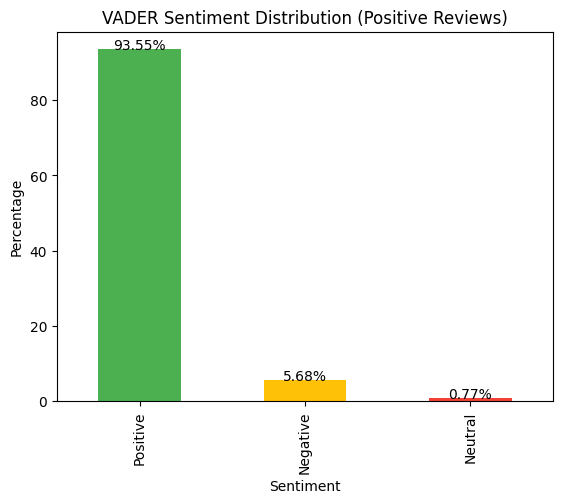

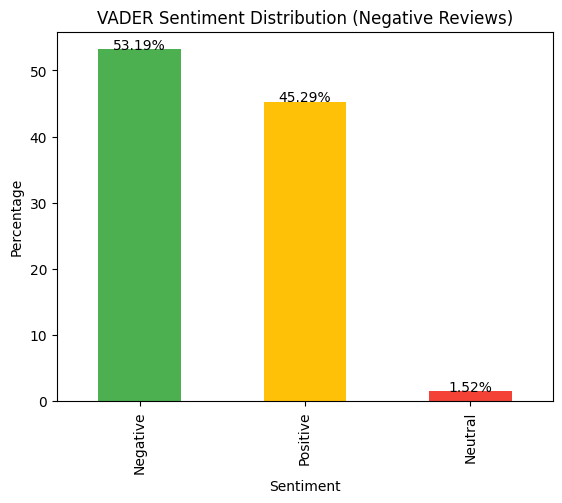

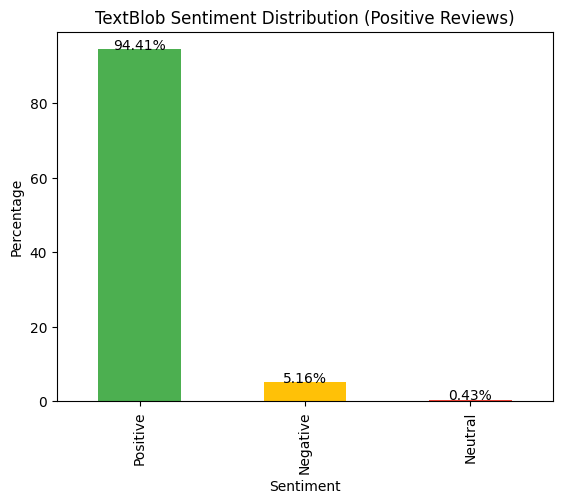

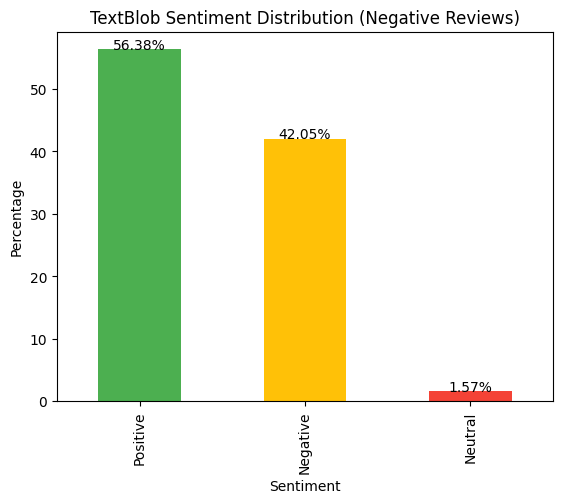

In [92]:
# Visualize the sentiment distribution for VADER with percentage labels

# For Positive Reviews
positive_vader_sentiment_counts = positive_reviews['VADER_Sentiment'].value_counts(normalize=True) * 100
ax = positive_vader_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('VADER Sentiment Distribution (Positive Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# For Negative Reviews
negative_vader_sentiment_counts = negative_reviews['VADER_Sentiment'].value_counts(normalize=True) * 100
ax = negative_vader_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('VADER Sentiment Distribution (Negative Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# Visualize the sentiment distribution for TextBlob with percentage labels

# For Positive Reviews
positive_textblob_sentiment_counts = positive_reviews['TextBlob_Sentiment'].value_counts(normalize=True) * 100
ax = positive_textblob_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('TextBlob Sentiment Distribution (Positive Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

# For Negative Reviews
negative_textblob_sentiment_counts = negative_reviews['TextBlob_Sentiment'].value_counts(normalize=True) * 100
ax = negative_textblob_sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('TextBlob Sentiment Distribution (Negative Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

### Topic Modeling

In [93]:
import gensim
from gensim import corpora

# Create a dictionary and corpus for LDA
def prepare_lda_data(reviews):
    text_data = [review.split() for review in reviews['Lemma']]
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    return dictionary, corpus

# For verified reviews
positive_dict, positive_corpus = prepare_lda_data(positive_reviews)
negative_dict, negative_corpus = prepare_lda_data(negative_reviews)

# Train LDA models
positive_lda_model = gensim.models.ldamodel.LdaModel(corpus=positive_corpus, num_topics=5, id2word=positive_dict, passes=15)
negative_lda_model = gensim.models.ldamodel.LdaModel(corpus=negative_corpus, num_topics=5, id2word=negative_dict, passes=15)

# Print the topics
print('Positive Reviews LDA Model')
print('---------------------')
print(positive_lda_model.print_topics())
print('Negative reviews LDA Model')
print('---------------------')
print(negative_lda_model.print_topics())

Positive Reviews LDA Model
---------------------
[(0, '0.018*"ba" + 0.009*"good" + 0.009*"crew" + 0.008*"flight" + 0.007*"lounge" + 0.007*"nice" + 0.007*"fly" + 0.006*"food" + 0.006*"seat" + 0.005*"london"'), (1, '0.028*"seat" + 0.026*"flight" + 0.014*"ba" + 0.013*"good" + 0.011*"service" + 0.011*"class" + 0.010*"food" + 0.010*"crew" + 0.009*"british" + 0.008*"business"'), (2, '0.022*"flight" + 0.014*"ba" + 0.010*"cabin" + 0.010*"crew" + 0.009*"london" + 0.009*"seat" + 0.009*"british" + 0.009*"airways" + 0.009*"staff" + 0.009*"time"'), (3, '0.018*"good" + 0.015*"ba" + 0.014*"flight" + 0.013*"food" + 0.012*"cabin" + 0.011*"crew" + 0.011*"seat" + 0.011*"london" + 0.009*"british" + 0.009*"airways"'), (4, '0.038*"flight" + 0.020*"good" + 0.015*"time" + 0.014*"service" + 0.014*"ba" + 0.013*"crew" + 0.012*"seat" + 0.010*"cabin" + 0.010*"food" + 0.009*"check"')]
Negative reviews LDA Model
---------------------
[(0, '0.041*"flight" + 0.026*"ba" + 0.018*"hour" + 0.015*"service" + 0.015*"late" +

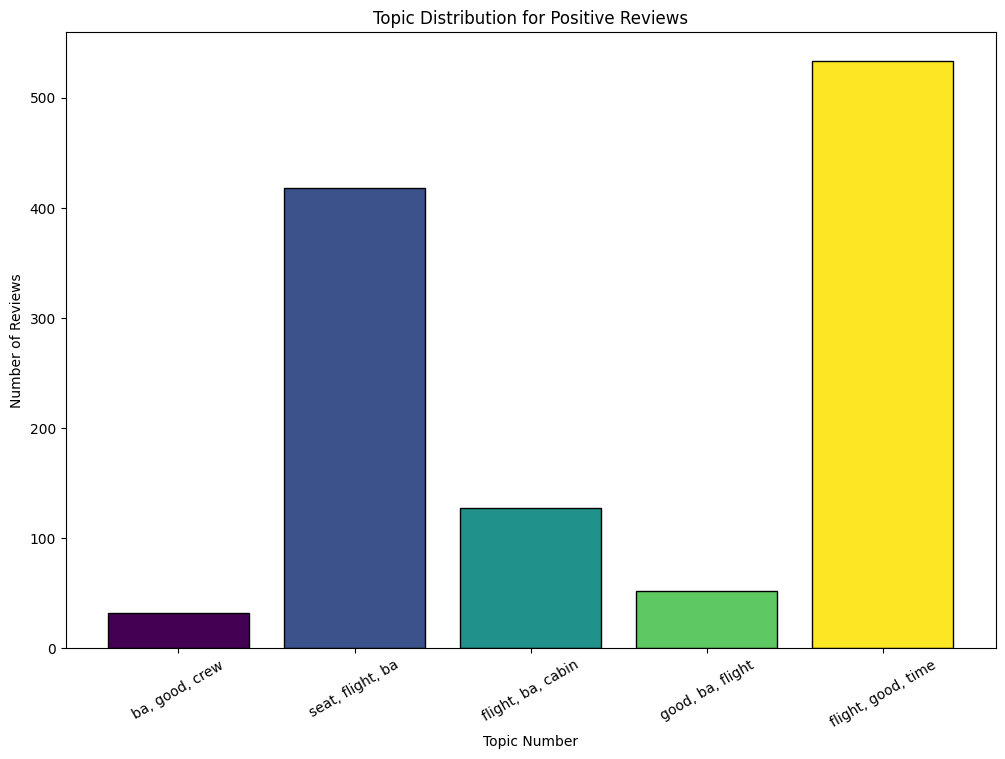

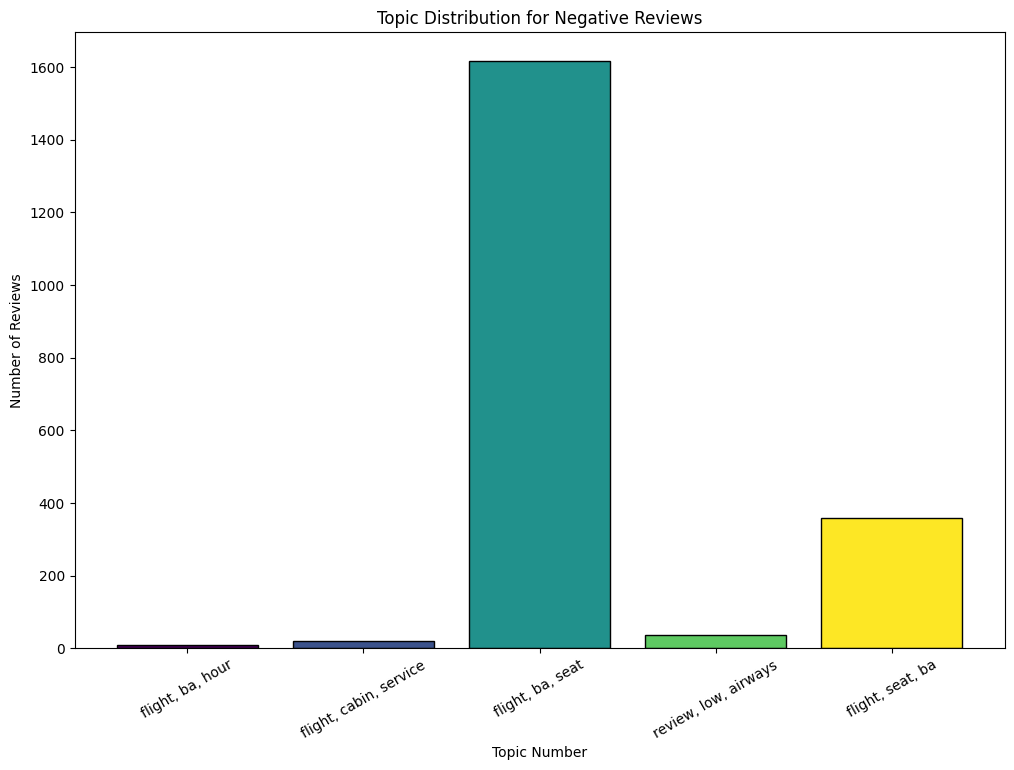

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def plot_topic_distribution_with_labels(lda_model, corpus, title):
    # Get the topic distribution
    topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
    topic_counts = [max(topics, key=lambda x: x[1])[0] for topics in topic_distribution]
    
    # Get topic names
    topic_labels = []
    for i in range(lda_model.num_topics):
        words = lda_model.show_topic(i, topn=3)  # Get the top 3 words for each topic
        topic_label = ", ".join([word for word, _ in words])
        topic_labels.append(topic_label)
    
    # Calculate counts for each topic
    unique, counts = np.unique(topic_counts, return_counts=True)
    
    # Colors for the bars
    colors = plt.cm.viridis(np.linspace(0, 1, lda_model.num_topics))
    
    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.bar(unique, counts, color=colors, edgecolor='black')
    plt.xlabel('Topic Number')
    plt.ylabel('Number of Reviews')
    plt.title(title)
    
    # Add labels to the bars
    plt.xticks(range(lda_model.num_topics), topic_labels, rotation=30, ha="center")
    
    plt.show()

# For positive reviews
plot_topic_distribution_with_labels(positive_lda_model, positive_corpus, 'Topic Distribution for Positive Reviews')

# For negative reviews
plot_topic_distribution_with_labels(negative_lda_model, negative_corpus, 'Topic Distribution for Negative Reviews')


### Word Cloud

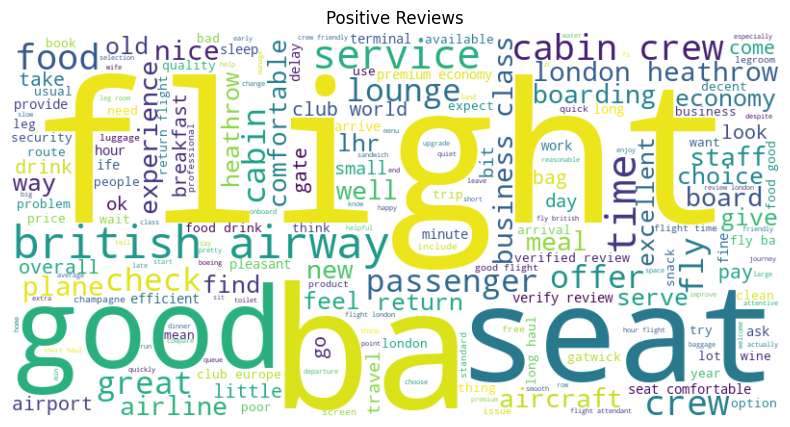

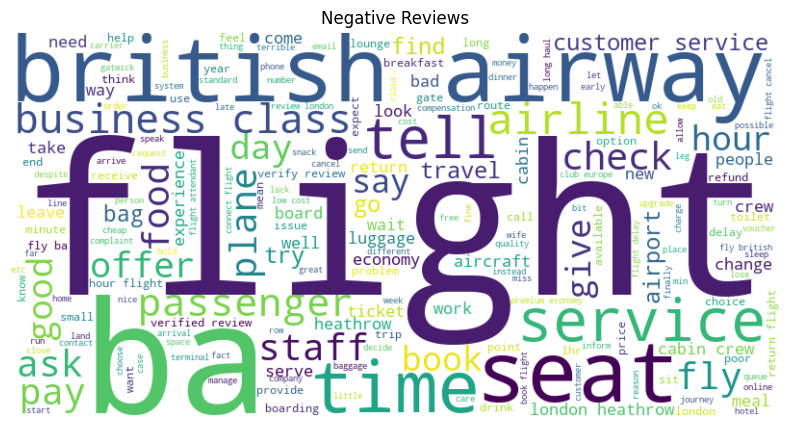

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# For positive reviews
generate_wordcloud(positive_reviews['Lemma'], 'Positive Reviews')

# For negative reviews
generate_wordcloud(negative_reviews['Lemma'], 'Negative Reviews')

### PREDICTIVE MODELING

In [97]:
model_df = df

In [98]:
model_df.shape

(3200, 13)

In [100]:
model_df.sample(5)

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended
2496,2497,Not Verified,"✅ Verified Review | British Airways from Gatwick to Barbados on Boeing 777. Flight departed on time and arrived at Bridgestone on schedule. I had seat 11K and my wife 11J on our outbound flight. Seat configuration may be a bit odd but suited us for a day time flight and made conversation easy, although the window seat could be a bit claustrophobic with the partition up. Food and drinks were very good, we both had chosen the fillet steak for the main course and although cooked a bit longer than we would prefer was still moist and tasty. Wine and Champagne selection very good. Cabin crew were faultless, for example my wife asked for a Jasmine Tea and although this is not included in their selection the stewardess offered one of her one teabags! Only real disappointment was the IFE, the B777 aircraft are showing their age and the technology is dated, however the biggest problem is the video and audio selections which ae very inferior than many airlines.",8,Couple Leisure,Business Class,4.0,5.0,4.0,4.0,3.0,4,yes
1268,1269,Trip Verified,"✅ | Manchester to London. The bag drop process took an hour even though I had checked in already. The staff offered little apology, explaining that there was a big group ahead and they could do nothing about this. Staff on the flight were clumsy and rude - one attendant dropped a water bottle on my shoulder and offered the merest apology. Another flight attendant didn’t bother to ask customers in the last rows if they wanted refreshments. Not exactly best of British, and I’ll certainly not be recommending!",3,Solo Leisure,Economy Class,3.0,1.0,1.0,1.0,1.0,2,no
2977,2978,Not Verified,"Excellent British Airways flight from Heathrow to Johannesburg. My second flight on the A380 which smooth, quiet and very comfortable. I think BA have improved both service and food to a good standard. My husband and I fly very regularly and found the meals on this flight enjoyable - much better than Emirates. However, BA had a disappointing selection of films.",9,Couple Leisure,Business Class,5.0,4.0,4.0,5.0,3.0,3,yes
772,773,Trip Verified,✅ | Fantastic flight down to Heathrow. Crew doing their best to keep everyone happy in challenging times. Nice to see they have introduced a free snack and water. It’s a start.,9,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,3.0,4,yes
1955,1956,Not Verified,"✅ Verified Review | An excellent experience on a roundtrip trip from Hong Kong to Copenhagen through London. Despite being in economy class, the flight attendants were attentive and also proactive (serving our needs before we even needed to ask). They were friendly and made us feel completely at home. The on-board entertainment selection was very extensive, with high-quality options (English and international movies of high caliber) and the screen interface was modern and easy to use. The seats on the flight from HKG-LHR on the Boeing 777-300ER were new, and much more comfortable than the average older seat. The pilot was incredibly descriptive of the flight path we were taking, and kept us up to date in terms of turbulence, arrival time, weather without being overbearing or overly disruptive. With regards to the pre-boarding/ground service, one of the check-in representatives went out of her way accommodating my boyfriend and I so that we could sit together and have a window seat (both of which were not available at check-in due to the fact that we had bought our tickets separately and had not selected seats beforehand). We really appreciated her willingness to look at what she could do to make our trip more pleasant. This was not my first time flying with British Airways, but it had been a long time since I last boarded a long-haul flight with them, and the trip exceeded my expectations. British Airways in my opini

In [103]:
model_df.isnull().sum()

Serial_No                 0
Trip_Verified             0
Feedback                  0
Overall_Rating            0
Type_of_Traveller         0
Seat_Type                 0
Seat_Comfort              0
Cabin_Staff_Service       0
Ground_Service            0
Food_and_Beverages        0
Inflight_Entertainment    0
Value_For_Money           0
Recommended               0
dtype: int64

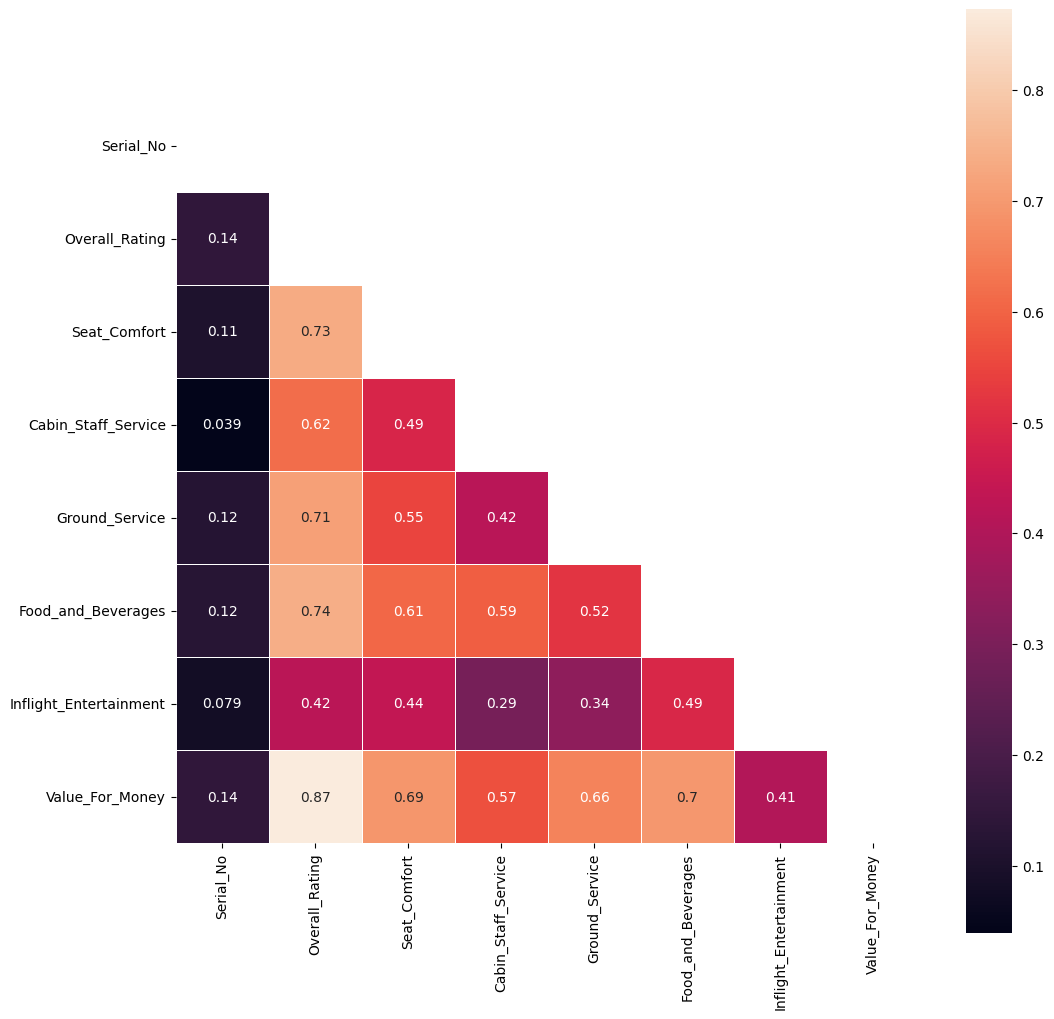

In [104]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(model_df.corr(numeric_only=True), dtype=bool))
sns.heatmap(model_df.corr(numeric_only=True), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

In [105]:
#Casting target variable as int datatype

model_df['Recommended'] = (model_df['Recommended'] == 'yes').astype(int)

In [106]:
model_df['Recommended'].head()

0    0
1    0
2    1
3    1
4    1
Name: Recommended, dtype: int64

In [110]:
#correlated columns with target

correlation = model_df.corr(numeric_only=True)
correlation['Recommended'].sort_values(ascending=False)

Recommended               1.000000
Overall_Rating            0.863215
Value_For_Money           0.800772
Food_and_Beverages        0.677989
Seat_Comfort              0.646922
Ground_Service            0.612924
Cabin_Staff_Service       0.569804
Inflight_Entertainment    0.370912
Serial_No                 0.116311
Name: Recommended, dtype: float64

In [111]:
'''
We drop Serial_No column due to less relevance.
'''

model_df.drop(['Serial_No'],inplace=True, axis=1)
#drop feedback next time to run

In [112]:
model_df.shape

(3200, 12)

Encoding and Standardization

In [113]:
y = model_df['Recommended']
X = model_df.drop(['Recommended'], axis=1)

In [115]:
X.drop(['Feedback'],inplace=True, axis=1)

In [116]:
cat_cols = X.select_dtypes(include='object')
cat_cols.columns

Index(['Trip_Verified', 'Type_of_Traveller', 'Seat_Type'], dtype='object')

In [117]:
model_df_encoded = pd.get_dummies(X,columns=cat_cols.columns,dtype= 'int')
model_df_encoded.sample(5)

,Overall_Rating,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Trip_Verified_Not Verified,Trip_Verified_Trip Verified,Type_of_Traveller_Business,Type_of_Traveller_Couple Leisure,Type_of_Traveller_Family Leisure,Type_of_Traveller_Solo Leisure,Seat_Type_Business Class,Seat_Type_Economy Class,Seat_Type_First Class,Seat_Type_Premium Economy
1628,3,2.0,3.0,3.0,2.0,3.0,1,1,0,1,0,0,0,1,0,0,0
167,3,1.0,1.0,3.0,2.0,2.0,2,0,1,1,0,0,0,1,0,0,0
859,5,2.0,4.0,4.0,4.0,1.0,2,0,1,0,0,0,1,0,1,0,0
287,8,3.0,4.0,4.0,3.0,1.0,4,0,1,0,1,0,0,1,0,0,0
1937,1,2.0,4.0,3.0,1.0,1.0,1,1,0,0,0,1,0,1,0,0,0


In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [119]:
'''
scale, fit and transform data
'''

scaler = StandardScaler()

scaled_df = scaler.fit_transform(model_df_encoded)

In [120]:
scaled_df = pd.DataFrame(scaled_df, columns = model_df_encoded.columns)

In [121]:
scaled_df.head()

,Overall_Rating,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Trip_Verified_Not Verified,Trip_Verified_Trip Verified,Type_of_Traveller_Business,Type_of_Traveller_Couple Leisure,Type_of_Traveller_Family Leisure,Type_of_Traveller_Solo Leisure,Seat_Type_Business Class,Seat_Type_Economy Class,Seat_Type_First Class,Seat_Type_Premium Economy
0,-0.444016,1.669175,1.163984,-1.145245,-0.963668,-0.750210,0.332321,-1.193416,1.193416,-0.520432,1.375976,-0.400326,-0.659528,-0.672239,0.922958,-0.236130,-0.325758
1,-1.083750,-1.243235,-0.824670,-1.145245,-0.963668,-0.750210,-1.054155,-1.193416,1.193416,-0.520432,-0.726757,-0.400326,1.516235,-0.672239,0.922958,-0.236130,-0.325758
2,0.835453,0.212970,1.163984,0.889239,1.121347,-0.750210,0.332321,-1.193416,1.193416,-0.520432,-0.726757,2.497963,-0.659528,1.487566,-1.083473,-0.236130,-0.325758
3,1.475188,1.669175,1.163984,0.889239,1.816352,2.215412,1.025559,0.837931,-0.837931,1.921479,-0.726757,-0.400326,-0.659528,-0.672239,-1.083473,4.234963,-0.325758
4,1.795055,0.941072,1.163984,0.889239,1.816352,-0.750210,1.025559,0.837931,-0.837931,-0.520432,1.375976,-0.400326,-0.659528,1.487566,-1.083473,-0.236130,-0.325758


Train, Test and Split

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [123]:
X_features = scaled_df.to_numpy()
y_label = y.values.reshape(-1,)

X_train, X_temp, y_train, y_temp = train_test_split(X_features, y_label, stratify = y_label, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=42)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (2240, 17)
Shape of X_val: (480, 17)
Shape of X_test: (480, 17)


Custom Plot Function

In [124]:
def plot_classification_metrics(test_y, predicted_y):
    # Confusion matrix
    C = confusion_matrix(test_y, predicted_y)

    # Precision matrix
    A = (C/C.sum(axis=0))
    
    # Recall matrix
    B = (((C.T)/(C.sum(axis=1))).T)
    
    plt.figure(figsize=(20,4))
    
    labels = ['Not Recommended', 'Recommended']
   
    cmap=sns.light_palette("green")
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap=cmap,fmt="d", xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')
    
    plt.subplot(1,3,2)
    sns.heatmap(A, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Precision matrix')
    
    plt.subplot(1,3,3)
    sns.heatmap(B, annot=True, cmap=cmap, xticklabels = labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Recall matrix')
    
    plt.show()

RANDOM FOREST

In [125]:
alpha = [200,500,1000,2000]
max_depth = [7, 10]
cv_auc_score = []
for i in alpha:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j,class_weight='balanced',
                                     random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        y_pred_prob = sig_clf.predict_proba(X_val)[:,1]
        cv_auc_score.append(roc_auc_score(y_val,y_pred_prob))
        print('For n_estimators {0}, max_depth {1} cross validation AUC score {2}'.
              format(i,j,roc_auc_score(y_val,y_pred_prob)))

For n_estimators 200, max_depth 7 cross validation AUC score 0.9850120809423134
For n_estimators 200, max_depth 10 cross validation AUC score 0.9838983690727877
For n_estimators 500, max_depth 7 cross validation AUC score 0.9852008456659619
For n_estimators 500, max_depth 10 cross validation AUC score 0.9841437632135308
For n_estimators 1000, max_depth 7 cross validation AUC score 0.9852952280277861
For n_estimators 1000, max_depth 10 cross validation AUC score 0.9840682573240712
For n_estimators 2000, max_depth 7 cross validation AUC score 0.9852952280277861
For n_estimators 2000, max_depth 10 cross validation AUC score 0.9840305043793415


In [126]:
best_alpha = np.argmax(cv_auc_score)
print('The optimal values are: n_estimators {0}, max_depth {1} '.format(alpha[int(best_alpha/2)],
                                                                        max_depth[int(best_alpha%2)]))
rf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)],
                            class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
rf_sig_clf.fit(X_train, y_train)
y_pred_prob = rf_sig_clf.predict_proba(X_train)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Train AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                    max_depth[int(best_alpha%2)],roc_auc_score(y_train,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_val)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Validation AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                            max_depth[int(best_alpha%2)],roc_auc_score(y_val,y_pred_prob)))
y_pred_prob = rf_sig_clf.predict_proba(X_test)[:,1]
print('For best n_estimators {0} best max_depth {1}, The Test AUC score is {2}'.format(alpha[int(best_alpha/2)],
                                                        max_depth[int(best_alpha%2)],roc_auc_score(y_test,y_pred_prob)))
y_pred = rf_sig_clf.predict(X_test)
print('The test AUC score is :', roc_auc_score(y_test,y_pred_prob))
print('The accuracy score is :', accuracy_score(y_test, y_pred))
print('The percentage of misclassified points {:05.2f}% :'.format((1-accuracy_score(y_test, y_pred))*100))

The optimal values are: n_estimators 1000, max_depth 7 
For best n_estimators 1000 best max_depth 7, The Train AUC score is 0.9957872183241478
For best n_estimators 1000 best max_depth 7, The Validation AUC score is 0.9852952280277861
For best n_estimators 1000 best max_depth 7, The Test AUC score is 0.9856072219383409
The test AUC score is : 0.9856072219383409
The accuracy score is : 0.9520833333333333
The percentage of misclassified points 04.79% :


MODEL EVALUATION

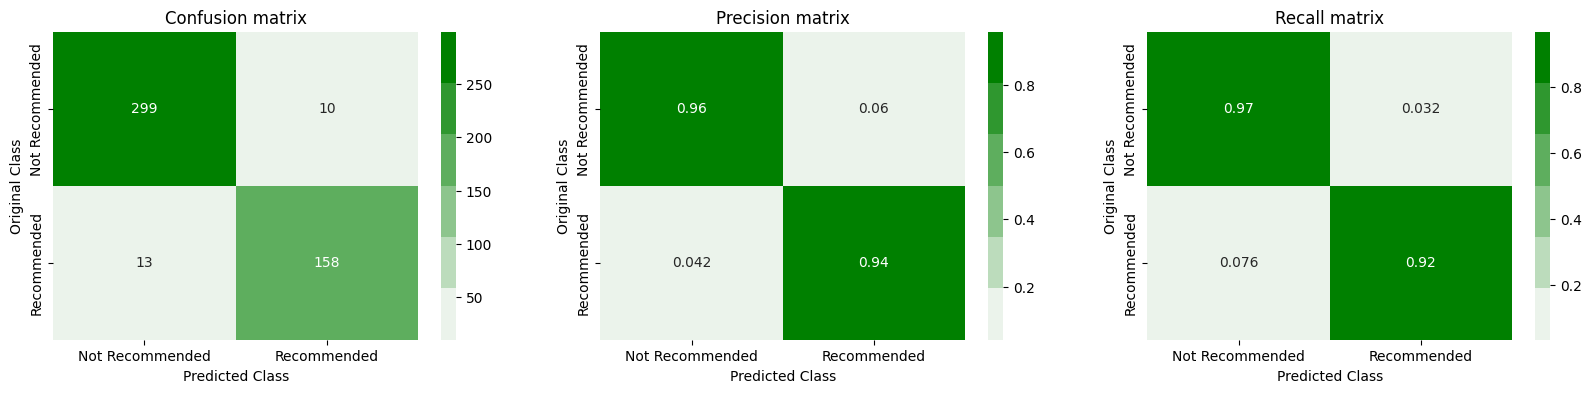

In [127]:
plot_classification_metrics(y_test, y_pred)

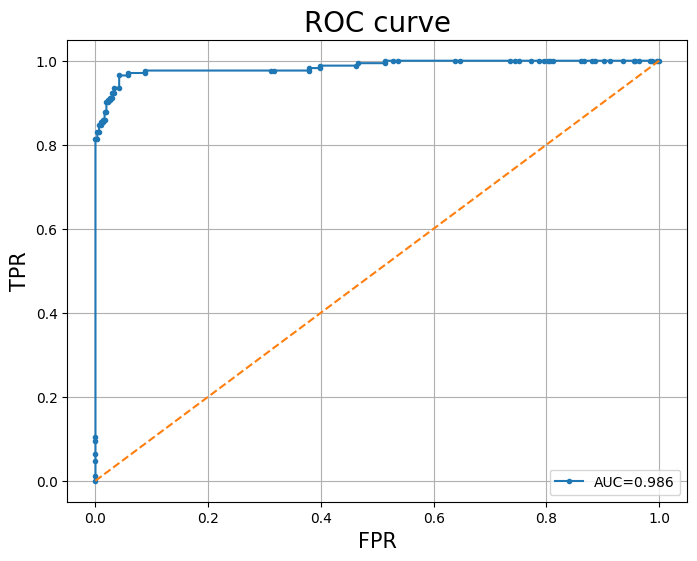

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()